In [38]:
from keras.datasets import mnist

In [39]:
import numpy as np

In [40]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
y_train.shape

(60000,)

In [43]:
import matplotlib.pyplot as plt

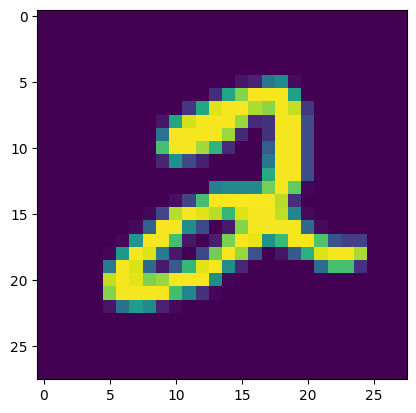

In [44]:
plt.imshow(x_train[5,:,:])

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train.reshape((60000,784)))
x_test_sc=sc.transform(x_test.reshape((10000,784)))

In [84]:
x_train_means=np.mean(x_train_sc,axis=0)


In [86]:
x_train_cen = x_train.reshape(60000,784) - x_train_means

In [ ]:
cov_4=np.dot(x_train_cen.T,x_train_cen)/(len(x_train_cen)-1)

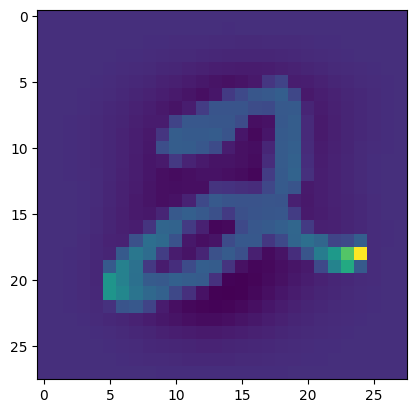

In [52]:
plt.imshow(x_train_sc[5,:].reshape(28,28))

In [11]:
x_train_sc.shape

(60000, 784)

In [88]:
cov=np.matmul(x_train_sc.T,x_train_sc)

since cov=sum(xi-xi')(xj-xj')/n-1' (since xi' and xj' =0 due to zero variance by standard scaling)

In [89]:
cov = np.divide(cov,len(x_train_sc))

In [90]:
cov_1=np.cov(x_train_sc.T)

In [91]:
cov_1.shape

(784, 784)

Now finding the eigenvectors and eigenvalues of the covariance matrix

In [93]:
eigenvalues,eigenvectors=np.linalg.eig(cov_1)

In [94]:
explained_variance=[]
for i in range(len(eigenvalues)):
    explained_variance.append((eigenvalues[i]/np.sum(eigenvalues)))

In [95]:
sum(explained_variance)

1.0000000000000016

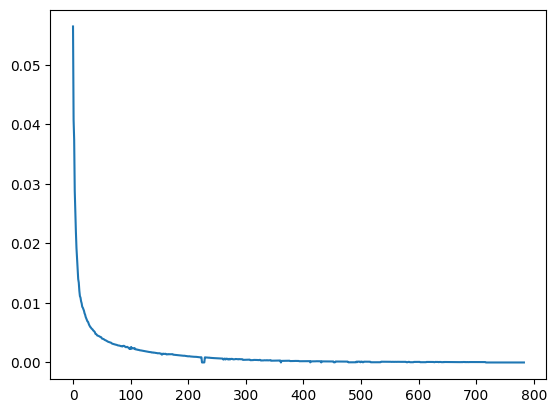

In [96]:
plt.plot(explained_variance)
plt.show()

In [97]:
cumsum=np.cumsum(explained_variance)

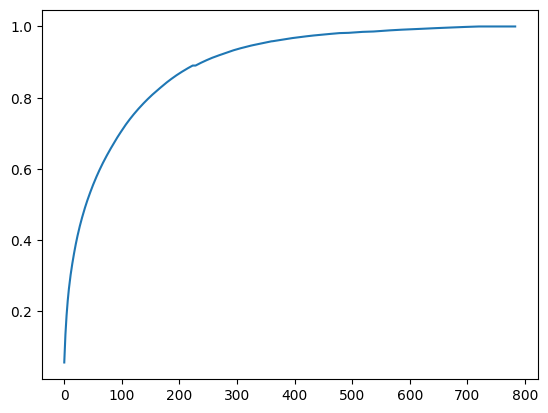

In [98]:
plt.plot(cumsum)

it is found that around 200 principal compononents accounts for 80% of variacne. So we will take the eigenvectors that consists of 200-dimensions. 

In [99]:
req=eigenvectors[:,:200]

req=W
so projection z=wTx


In [100]:
req.shape

(784, 200)

In [101]:
eigenface = np.apply_along_axis(lambda x:np.dot(req.T,x),1,x_train_sc)

Now the resulting matrix will be a shape of (60000,30)
where each data is projected with the eigenvector

In [102]:
eigenface.shape

(60000, 200)

In [103]:
eigenface_test=np.apply_along_axis(lambda x:np.dot(req.T,x),1,x_test_sc)

In [104]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [105]:
clf=SVC(kernel='rbf')

In [106]:
clf.fit(eigenface,y_train)

SVC()

In [107]:
y_pred=clf.predict(eigenface_test)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.94      0.96      0.95      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

